In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=r"C:\Users\singh\Downloads\Visadataset.csv"
visa_df=pd.read_csv(data)

In [3]:
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [4]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [6]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- there are

- also there are 16861 applicants are app

- we also to know how many applicants from asia got certified

- and how many applicants from asia got denied

In [ ]:
Step-1: Select the continent data
Step-2: continent data == 'Asia' it is con1
Step-3: select the case status data
Step-4: case status data == 'Certified' is con2
Step-5: con=con1&con2
step-6: apply main df on con get the len

In [11]:
visa_df['continent']
con1= visa_df['continent']=='Asia'
visa_df['case_status']
con2=visa_df['case_status']=='Certified'
con=con1 & con2
len(visa_df[con])

11012

In [18]:
l=visa_df['continent'].unique()
for i in l:
    con1= visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con=con1 & con2
len(visa_df[con])

122

In [20]:
l=visa_df['continent'].unique()
certified_count=[]
denied_count=[]
for i in l:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cer_con=con1 & con2
    den_con=con1 & con3
    certified_count.append(len(visa_df[cer_con]))
    denied_count.append(len(visa_df[den_con]))
cols=sorted(visa_df['case_status'].unique())
print(cols)
pd.DataFrame(zip( certified_count,denied_count),columns=cols,index=l)

['Certified', 'Denied']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

In [23]:
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

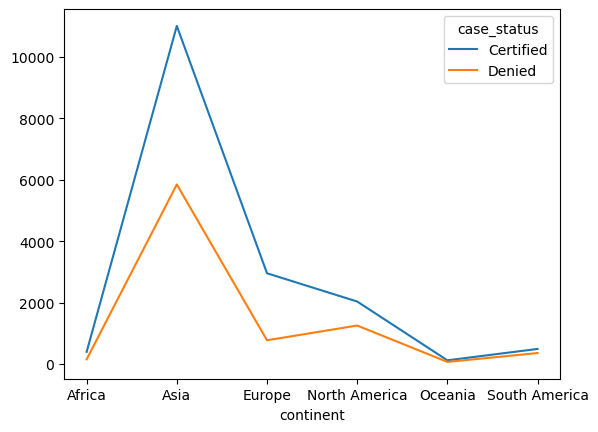

In [24]:
r1.plot()

<Axes: xlabel='continent'>

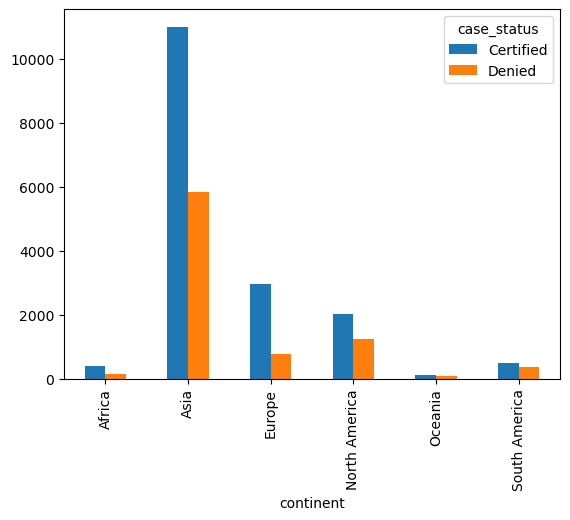

In [25]:
r1.plot(kind='bar')

**case status-continent-education_of_employee**

In [ ]:
# from asia there 16K applicants applied for visa
#         in that 11K ppl got certified
#             in that 11K ppl different edu applicants are available

# we want those information

In [28]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
r2=pd.crosstab(col1,cols)
r2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

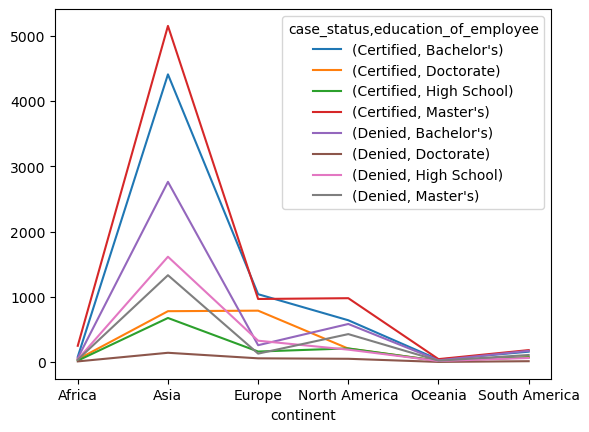

In [29]:
r2.plot()

<Axes: xlabel='continent'>

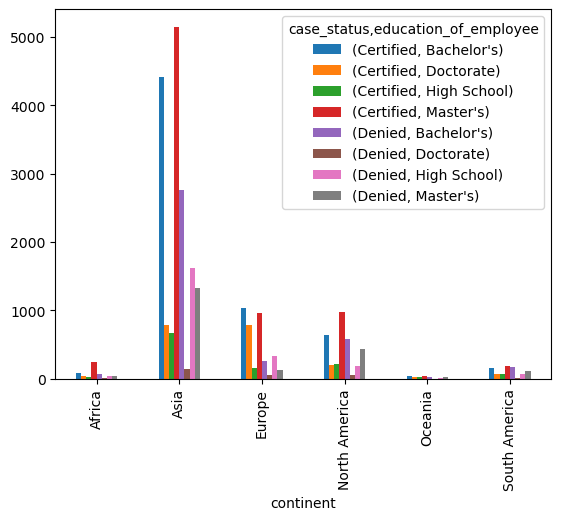

In [31]:
r2.plot(kind='bar')

In [32]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [ ]:
visa_df['prevailing_wage']
wage are numerical num

In [33]:
list(visa_df.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [34]:
visa_df.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [36]:
visa_df.groupby('education_of_employee').size()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [37]:
#based on group by select an anothor col
visa_df.groupby('education_of_employee')['prevailing_wage']

In [38]:
visa_df['prevailing_wage'].mean()
#mean wage of all24580 observation
#bac,doc,hs,master

np.float64(74455.81459209183)

In [ ]:
visa_df[visa_df('education_of_employee')=="Bachelor's"]

In [ ]:
visa_df.groupby('education_of_employee')

In [40]:
con=visa_df['case_status']=='Certified'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64